<a href="https://colab.research.google.com/github/PaoDeVi/T-picos-IA/blob/main/Proyecto_ML_Comparaci%C3%B3nes_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

###**DESCARGAR Y VISUALIZAR DATOS**

In [ ]:
#CONJUNTO DE ENTRENAMIENTO
#Determinar el rango de tiempo de los datos
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2024, 4, 30)
independientes = ['AAPL','META', 'AMZN', 'GOOGL', 'MSFT']
indices = ['^GSPC', '^DJI']

# Descargar los datos
df = yf.download(independientes, start=start_date, end=end_date)
index_df = yf.download(indices, start=start_date, end=end_date)

# Preparar los datos
data = pd.DataFrame()
data['AAPL'] = pd.to_numeric(df['Adj Close']['AAPL'], errors='coerce')
data['META'] = pd.to_numeric(df['Adj Close']['META'], errors='coerce')
data['AMZN'] = pd.to_numeric(df['Adj Close']['AMZN'], errors='coerce')
data['GOOGL'] = pd.to_numeric(df['Adj Close']['GOOGL'], errors='coerce')
data['MSFT'] = pd.to_numeric(df['Adj Close']['MSFT'], errors='coerce')
data['S&P500'] = pd.to_numeric(index_df['Adj Close']['^GSPC'], errors='coerce')
data['DowJones'] = pd.to_numeric(index_df['Adj Close']['^DJI'], errors='coerce')

display(data)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed


,AAPL,META,AMZN,GOOGL,MSFT,S&P500,DowJones
Date,,,,,,,
2015-01-02,24.435272,78.366852,15.426000,26.477501,40.378063,2058.199951,17832.990234
2015-01-05,23.746885,77.108192,15.109500,25.973000,40.006752,2020.579956,17501.650391
2015-01-06,23.749119,76.069290,14.764500,25.332001,39.419571,2002.609985,17371.640625
2015-01-07,24.082146,76.069290,14.921000,25.257500,39.920406,2025.900024,17584.519531
2015-01-08,25.007431,78.097137,15.023000,25.345501,41.094791,2062.139893,17907.869141
...,...,...,...,...,...,...,...
2024-04-23,166.899994,496.100006,179.539993,158.259995,407.570007,5070.549805,38503.691406
2024-04-24,169.020004,493.500000,176.589996,159.130005,409.059998,5071.629883,38460.921875
2024-04-25,169.889999,441.380005,173.669998,156.000000,399.040009,5048.419922,38085.800781


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 2015-01-02 to 2024-04-29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      2346 non-null   float64
 1   META      2346 non-null   float64
 2   AMZN      2346 non-null   float64
 3   GOOGL     2346 non-null   float64
 4   MSFT      2346 non-null   float64
 5   S&P500    2346 non-null   float64
 6   DowJones  2346 non-null   float64
dtypes: float64(7)
memory usage: 146.6 KB


,AAPL,META,AMZN,GOOGL,MSFT,S&P500,DowJones
count,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000
mean,85.433515,199.477552,94.701309,76.237250,165.286214,3191.849680,26715.486301
std,58.240322,90.284062,49.979225,37.715277,109.365036,924.793027,6537.475680
min,20.772152,73.971519,14.347500,24.853001,34.886097,1829.079956,15660.179688
25%,33.672372,131.922527,46.889874,46.191126,62.621327,2385.477478,20920.754883
50%,53.447695,178.730362,91.986500,60.986250,131.773590,2919.385010,26156.629883
75%,144.085381,258.640587,140.288998,109.667498,254.596058,4077.582458,33210.703125
max,197.857529,527.340027,189.050003,171.949997,429.369995,5254.350098,39807.371094


<ipython-input-4-31a3f24849e3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[feature], label=feature, palette='Set1')
<ipython-input-4-31a3f24849e3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[feature], label=feature, palette='Set1')
<ipython-input-4-31a3f24849e3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[feature], label=feature, palette='Set1')
<ipython-input-4-31a3f24849e3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[feature], label=feature, palette='Set1')
<ipython-input-4-31a3f24849e3>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data[feature], label=feature, palette='Set1')


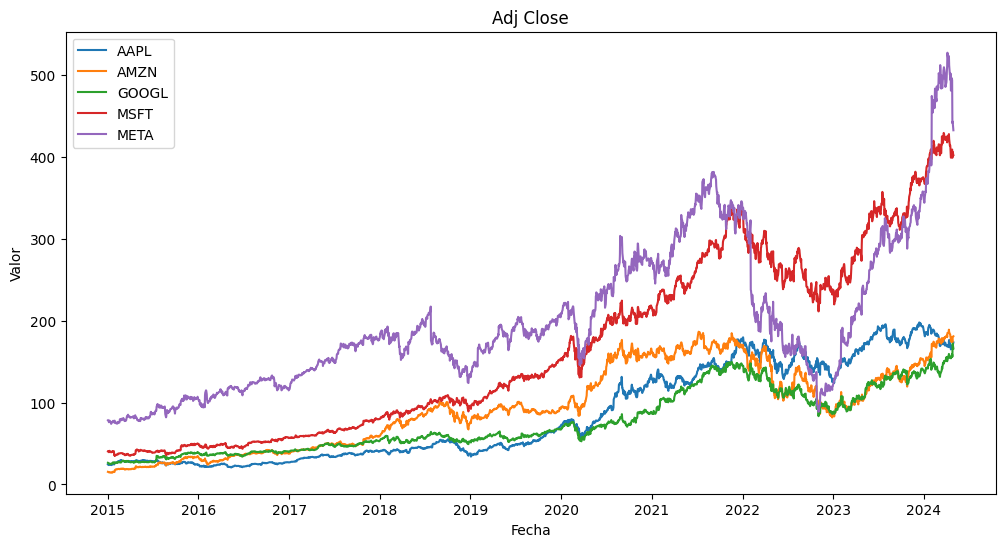

In [ ]:
plt.figure(figsize=(12, 6))
for feature in ['AAPL', 'AMZN', 'GOOGL', 'MSFT','META']:
    sns.lineplot(data=data[feature], label=feature, palette='Set1')

plt.title('Adj Close')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

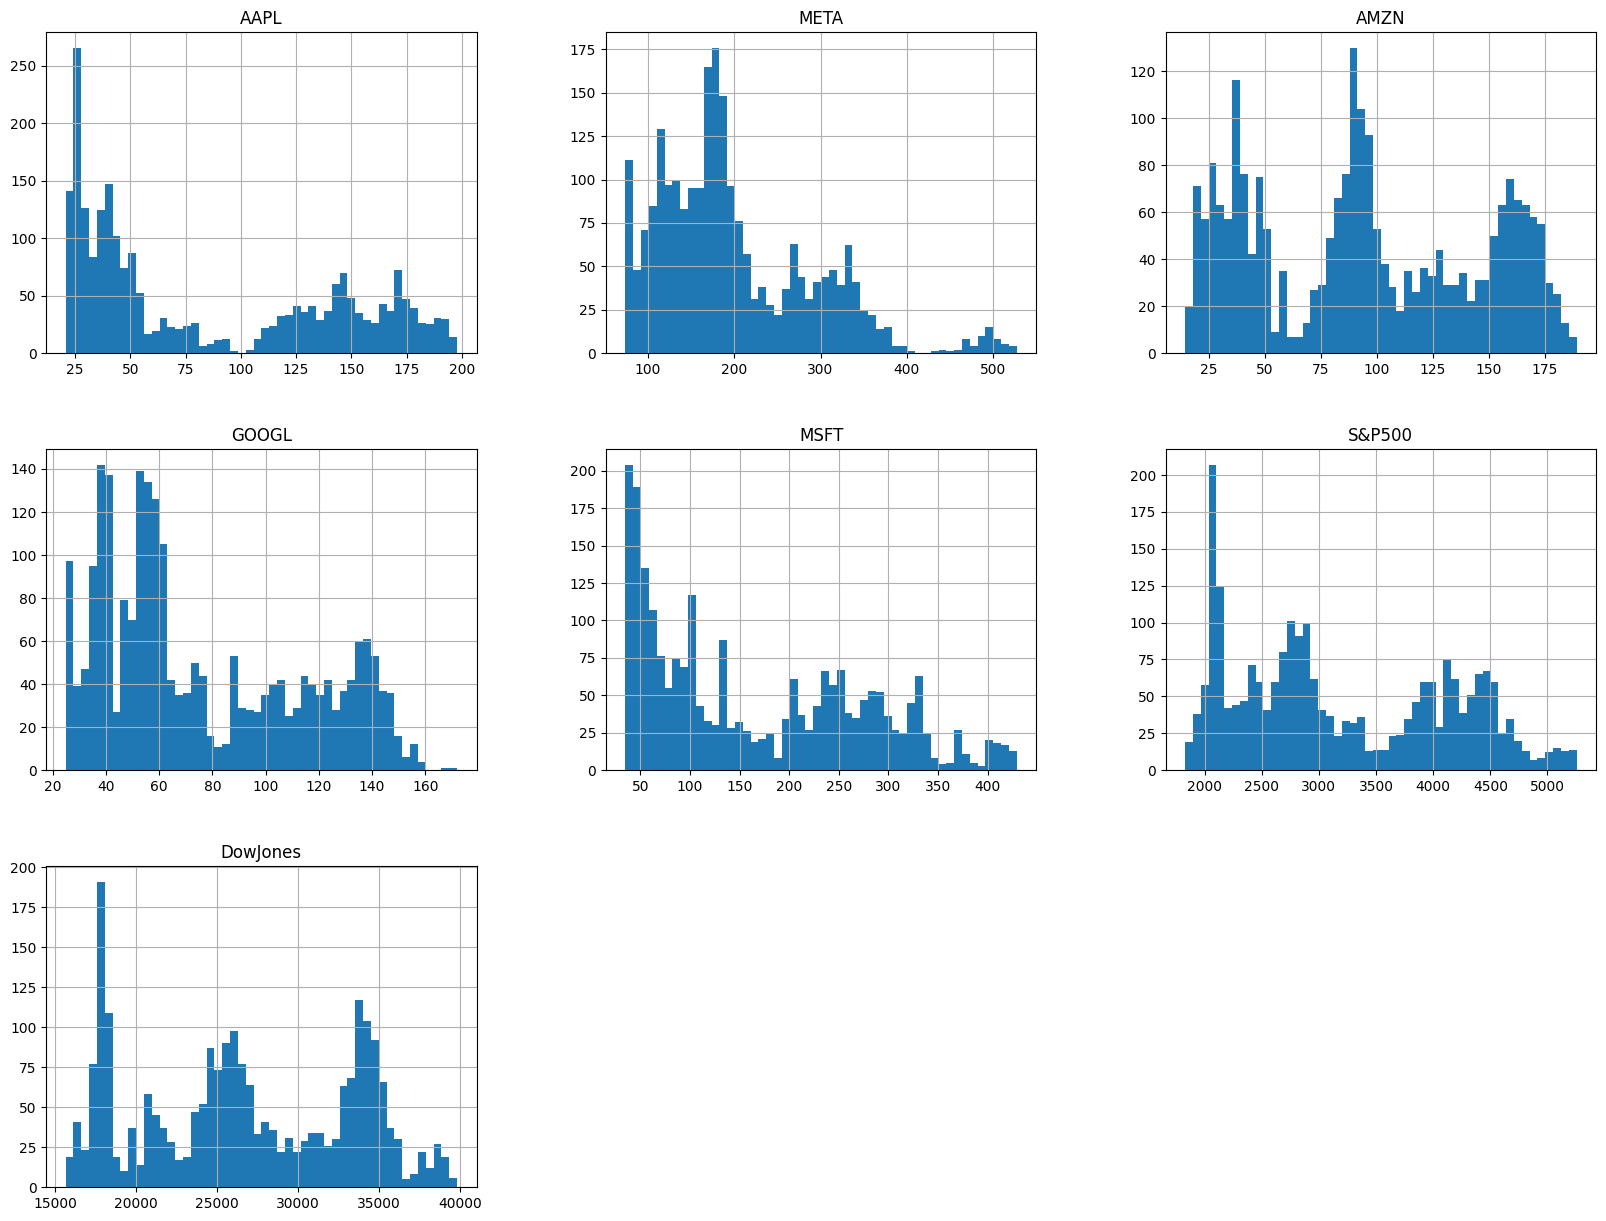

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

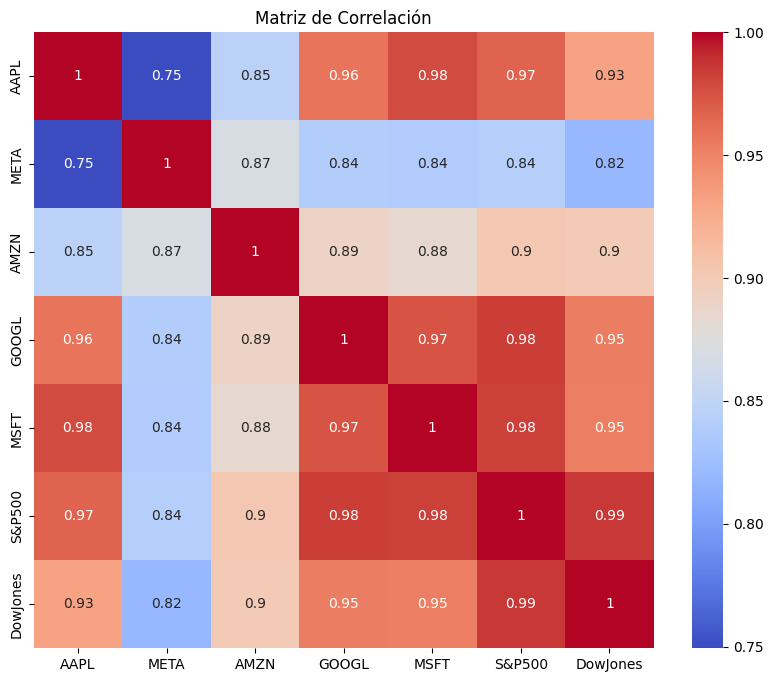

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='META', ylabel='AAPL'>,
        <Axes: xlabel='AMZN', ylabel='AAPL'>,
        <Axes: xlabel='GOOGL', ylabel='AAPL'>,
        <Axes: xlabel='MSFT', ylabel='AAPL'>,
        <Axes: xlabel='S&P500', ylabel='AAPL'>,
        <Axes: xlabel='DowJones', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='META'>,
        <Axes: xlabel='META', ylabel='META'>,
        <Axes: xlabel='AMZN', ylabel='META'>,
        <Axes: xlabel='GOOGL', ylabel='META'>,
        <Axes: xlabel='MSFT', ylabel='META'>,
        <Axes: xlabel='S&P500', ylabel='META'>,
        <Axes: xlabel='DowJones', ylabel='META'>],
       [<Axes: xlabel='AAPL', ylabel='AMZN'>,
        <Axes: xlabel='META', ylabel='AMZN'>,
        <Axes: xlabel='AMZN', ylabel='AMZN'>,
        <Axes: xlabel='GOOGL', ylabel='AMZN'>,
        <Axes: xlabel='MSFT', ylabel='AMZN'>,
        <Axes: xlabel='S&P500', ylabel='AMZN'>,
        <Axes: xlabel='DowJones', ylabel='AMZN'>],
       [<A

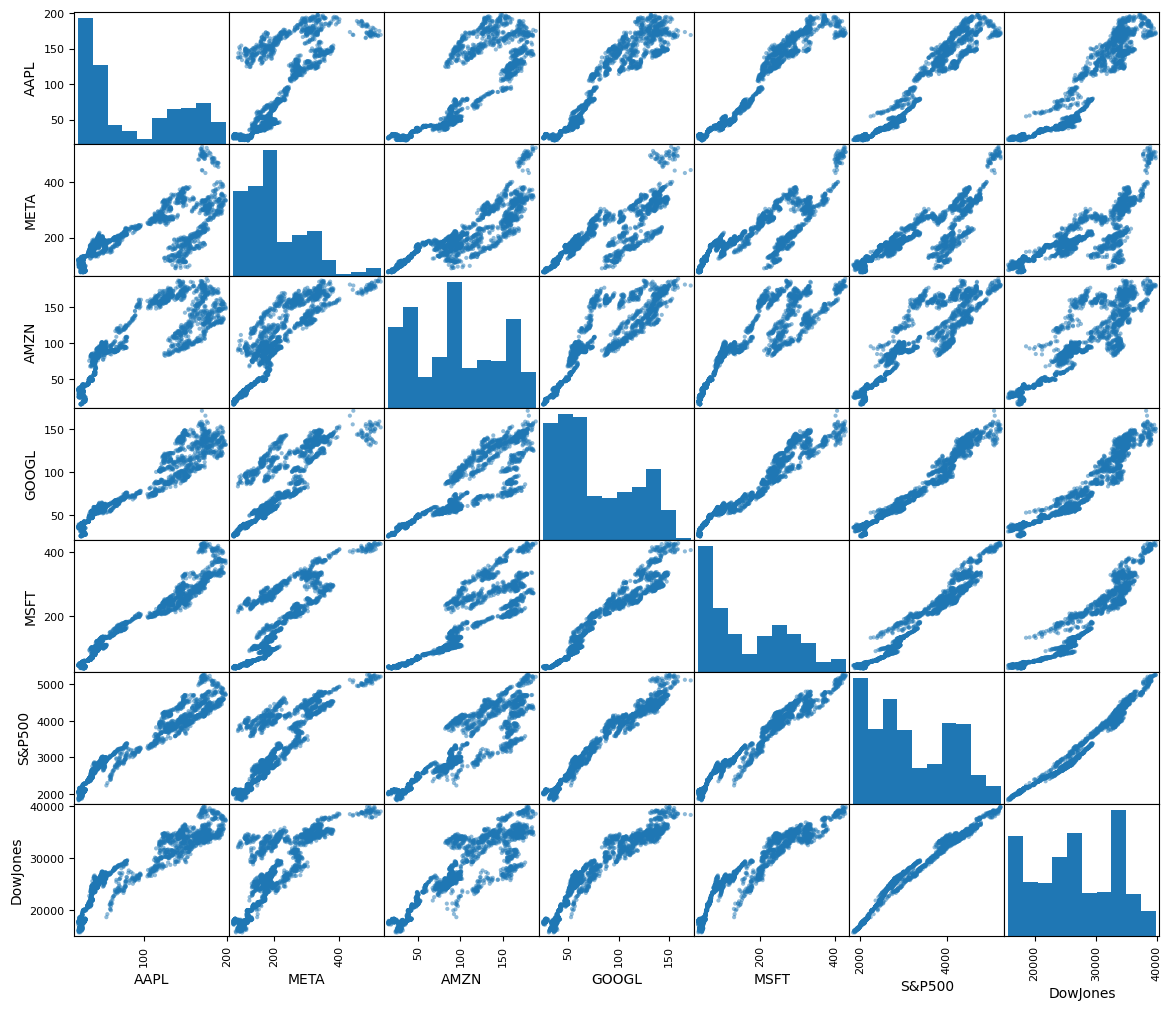

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ['AAPL','META','AMZN', 'GOOGL', 'MSFT','S&P500','DowJones']
scatter_matrix(data[attributes], figsize=(14, 12))

In [ ]:
# Realizar la transformación de series de tiempo con un time delay de 5 días
lagged_data = pd.DataFrame()
i = 4
lagged_data[f'AAPL_Lag'] = data['AAPL'].shift(i)
lagged_data[f'META_Lag'] = data['META'].shift(i)
lagged_data[f'AMZN_Lag'] = data['AMZN'].shift(i)
lagged_data[f'GOOGL_Lag'] = data['GOOGL'].shift(i)
lagged_data[f'MSFT_Lag'] = data['MSFT'].shift(i)
lagged_data[f'S&P500_Lag'] = data['S&P500'].shift(i)
lagged_data[f'DowJones_Lag'] = data['DowJones'].shift(i)

display(lagged_data)

,AAPL_Lag,META_Lag,AMZN_Lag,GOOGL_Lag,MSFT_Lag,S&P500_Lag,DowJones_Lag
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,24.435272,78.366852,15.426000,26.477501,40.378063,2058.199951,17832.990234
...,...,...,...,...,...,...,...
2024-04-23,168.000000,494.170013,181.279999,155.470001,411.839996,5022.209961,37753.308594
2024-04-24,167.039993,501.799988,179.220001,156.009995,404.269989,5011.120117,37775.378906
2024-04-25,165.000000,481.070007,174.630005,154.089996,399.119995,4967.229980,37986.398438


In [ ]:
table = pd.concat([data,lagged_data],axis=1)
table = table.dropna()
display(table)

,AAPL,META,AMZN,GOOGL,MSFT,S&P500,DowJones,AAPL_Lag,META_Lag,AMZN_Lag,GOOGL_Lag,MSFT_Lag,S&P500_Lag,DowJones_Lag
Date,,,,,,,,,,,,,,
2015-01-08,25.007431,78.097137,15.023000,25.345501,41.094791,2062.139893,17907.869141,24.435272,78.366852,15.426000,26.477501,40.378063,2058.199951,17832.990234
2015-01-09,25.034248,77.657600,14.846500,25.035999,40.749374,2044.810059,17737.369141,23.746885,77.108192,15.109500,25.973000,40.006752,2020.579956,17501.650391
2015-01-12,24.417387,76.638687,14.570500,24.853001,40.239906,2028.260010,17640.839844,23.749119,76.069290,14.764500,25.332001,39.419571,2002.609985,17371.640625
2015-01-13,24.634186,76.368965,14.737000,25.090000,40.032661,2023.030029,17613.679688,24.082146,76.069290,14.921000,25.257500,39.920406,2025.900024,17584.519531
2015-01-14,24.540314,76.199150,14.663500,25.296499,39.687263,2011.270020,17427.089844,25.007431,78.097137,15.023000,25.345501,41.094791,2062.139893,17907.869141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,166.899994,496.100006,179.539993,158.259995,407.570007,5070.549805,38503.691406,168.000000,494.170013,181.279999,155.470001,411.839996,5022.209961,37753.308594
2024-04-24,169.020004,493.500000,176.589996,159.130005,409.059998,5071.629883,38460.921875,167.039993,501.799988,179.220001,156.009995,404.269989,5011.120117,37775.378906
2024-04-25,169.889999,441.380005,173.669998,156.000000,399.040009,5048.419922,38085.800781,165.000000,481.070007,174.630005,154.089996,399.119995,4967.229980,37986.398438


In [ ]:
#CONJUNTO DE PRUEBA(TEST)
#Determinar el rango de tiempo de los datos
start_date = datetime.datetime(2024, 4, 1)
end_date = datetime.datetime(2024, 4, 28)
test_data = table.copy()
test_data = test_data.iloc[2325:]
display(test_data)

,AAPL,META,AMZN,GOOGL,MSFT,S&P500,DowJones,AAPL_Lag,META_Lag,AMZN_Lag,GOOGL_Lag,MSFT_Lag,S&P500_Lag,DowJones_Lag
Date,,,,,,,,,,,,,,
2024-04-05,169.580002,527.340027,185.070007,152.500000,425.519989,5204.339844,38904.039062,170.029999,491.350006,180.970001,155.490005,424.570007,5243.770020,39566.851562
2024-04-08,168.449997,519.250000,185.190002,154.850006,424.589996,5202.390137,38892.800781,168.839996,497.369995,180.690002,154.559998,421.440002,5205.810059,39170.238281
2024-04-09,169.669998,516.900024,185.669998,156.600006,426.279999,5209.910156,38883.671875,169.649994,506.739990,182.410004,154.919998,420.450012,5211.490234,39127.140625
2024-04-10,167.779999,519.830017,185.949997,156.139999,423.260010,5160.640137,38461.511719,168.820007,510.920013,180.000000,150.529999,417.880005,5147.209961,38596.980469
2024-04-11,175.039993,523.159973,189.050003,159.410004,427.929993,5199.060059,38459.078125,169.580002,527.340027,185.070007,152.500000,425.519989,5204.339844,38904.039062
2024-04-12,176.550003,511.899994,186.130005,157.729996,421.899994,5123.410156,37983.238281,168.449997,519.250000,185.190002,154.850006,424.589996,5202.390137,38892.800781
2024-04-15,172.690002,500.230011,183.619995,154.860001,413.640015,5061.819824,37735.109375,169.669998,516.900024,185.669998,156.600006,426.279999,5209.910156,38883.671875
2024-04-16,169.380005,499.760010,183.320007,154.399994,414.579987,5051.410156,37798.968750,167.779999,519.830017,185.949997,156.139999,423.260010,5160.640137,38461.511719
2024-04-17,168.000000,494.170013,181.279999,155.470001,411.839996,5022.209961,37753.308594,175.039993,523.159973,189.050003,159.410004,427.929993,5199.060059,38459.078125


###**PREPARAR LOS DATOS PARA EL ALGORITMO**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Separar los datos de entrenamiento y validación (Así como X - y)
split_ratio = 0.7
split_index = int(2325 * split_ratio)
data_train = table.copy()
data_train = data_train.iloc[:2325]
data_val = table.copy()
data_val = data_val.iloc[:2325]

X = data_train.drop(columns=['AAPL'])
y = data_train['AAPL']
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()
# Aplicar el escalador a los datos de características (X)
X_scaled = scaler.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)

#Test (Mes de Abril 2024)

Test_data_X_scaled = test_data.drop(columns=['AAPL'])
Test_data_X_scaled = scaler.fit_transform(Test_data_X_scaled)
Test_data_y = test_data['AAPL']
Test_data_y = scaler_y.transform(Test_data_y.values.reshape(-1, 1))

#data_train.info()
display(X_train_scaled)

array([[0.00941452, 0.00392224, 0.00376999, ..., 0.0139219 , 0.06689107,
        0.08998192],
       [0.00841151, 0.00289741, 0.00140082, ..., 0.01298064, 0.055908  ,
        0.07626024],
       [0.00608639, 0.00129484, 0.        , ..., 0.01149216, 0.05066171,
        0.07087619],
       ...,
       [0.60403462, 0.93439615, 0.74617064, ..., 0.54870442, 0.69910405,
        0.76089562],
       [0.60759072, 0.93392577, 0.74461289, ..., 0.55741815, 0.69856677,
        0.75218974],
       [0.61349474, 0.91803359, 0.74746814, ..., 0.55377925, 0.68239004,
        0.73010141]])

###**1. Regresión Multivariada Propia**



In [ ]:
def regresion_multivariada(T,X):
  return np.dot(X,T)

In [ ]:
def errores_cuadrados(y,y_): #Cálculo del error mediante error cuadrático medio
    M = y.shape[0]
    error = np.sum((y-y_)**2)/M
    return error

In [ ]:
def gradiente_descendente_multivariado(X, theta, y, alpha, epochs):
    m = len(y)
    error_historial = []

    for _ in range(epochs):

        y_pred = regresion_multivariada(theta,X)
        error = y_pred - y

        gradiente = np.dot(X.T, error) / m

        theta -= alpha * gradiente

        error_actual = errores_cuadrados(y, y_pred)
        error_historial.append(error_actual)

    return theta

Mean Squared Error para Apple (AAPL) (Entrenamiento): 0.0


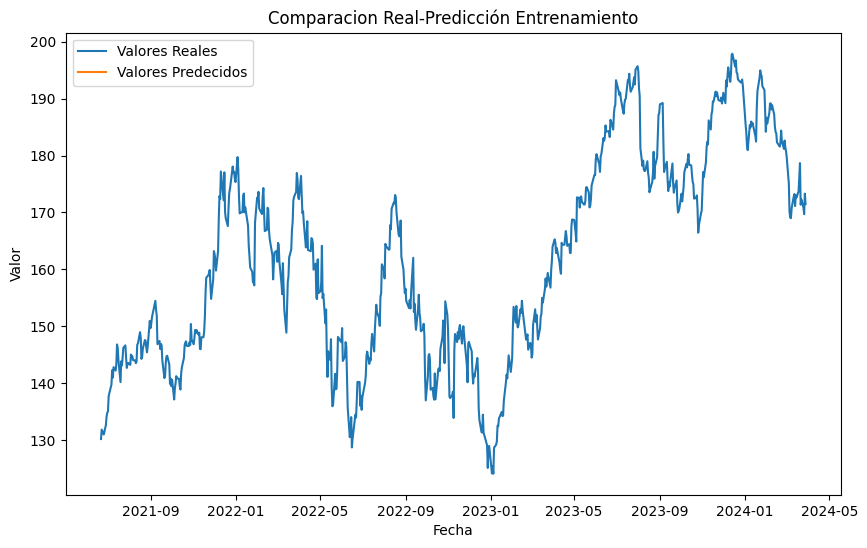

AttributeError: 'numpy.ndarray' object has no attribute 'insert'

In [ ]:
aux = X_train_scaled.copy()
aux.insert(0, 'intercept', 1)
X = aux.values
y = y_train.values
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 9000

#Proceso de entrenamiento
theta_optimo = gradiente_descendente_multivariado(X,theta,y,alpha,iterations)

#Proceso de validación con el 30%
aux_X = X_test_scaled.copy()
aux_X.insert(0, 'intercept', 1)
yv_ = regresion_multivariada(theta_optimo, aux_X)
error_exp1 = errores_cuadrados(y_test,yv_)
print("Mean Squared Error para Apple (AAPL) (Entrenamiento):", error_exp1)

plt.figure(figsize=(10,6))
plt.plot(y_test.index,y_test,label='Valores Reales')
plt.plot(y_test.index,yv_,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción Entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#---------------------------------------------------
aux_X = Test_data_X_scaled.copy()
aux_X.insert(0, 'intercept', 1)
yv_ = regresion_multivariada(theta_optimo,aux_X)
error_exp1 = errores_cuadrados(Test_data_y,yv_)
print("Mean Squared Error para Apple (AAPL) (Prueba): ", error_exp1)
print(Test_data_y)
print(yv_)

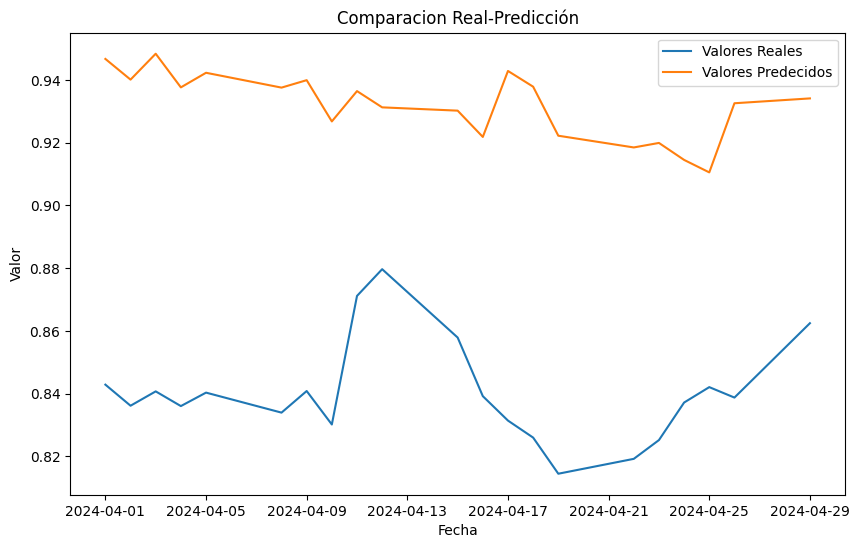

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Test_data_y.index,Test_data_y,label='Valores Reales')
plt.plot(Test_data_y.index,yv_,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

###**2. Regresión Lineal Scikit**

Mean Squared Error para Apple (AAPL) (Entrenamiento): 0.0008102730396684538


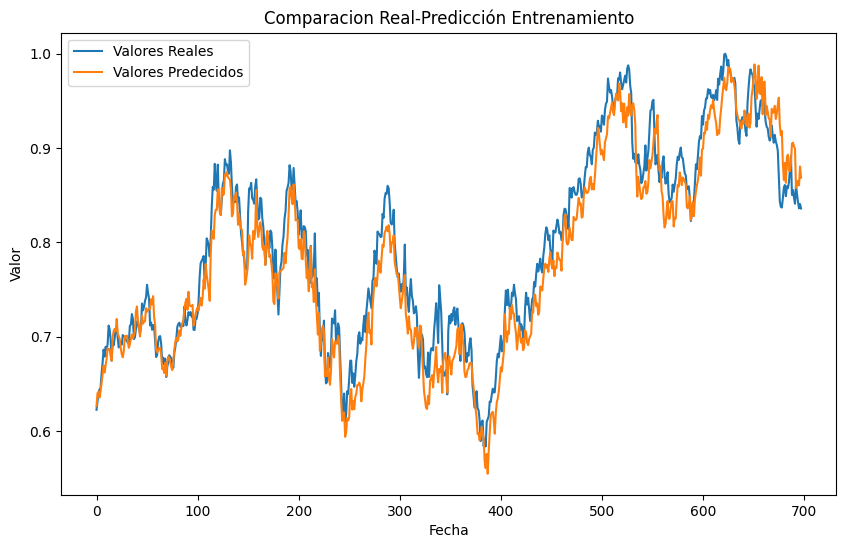

Mean Squared Error para Apple (AAPL) (Prueba): 0.2814138861336844
[[0.84031699]
 [0.83393585]
 [0.84082519]
 [0.83015238]
 [0.87114952]
 [0.87967654]
 [0.85787914]
 [0.8391876 ]
 [0.83139472]
 [0.82597357]
 [0.81445374]
 [0.8191972 ]
 [0.825183  ]
 [0.83715468]
 [0.84206754]
 [0.83873583]
 [0.86245319]]
[[ 0.67023914]
 [ 0.59120938]
 [ 0.67885876]
 [ 0.60919497]
 [ 0.62122599]
 [ 0.37881095]
 [ 0.20097416]
 [ 0.10233192]
 [ 0.41366561]
 [ 0.5446539 ]
 [ 0.18051432]
 [-0.00103759]
 [ 0.21005005]
 [ 0.29397409]
 [ 0.1310034 ]
 [ 0.28788929]
 [ 0.13957762]]


In [ ]:
# Perform linear regression on the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lin_reg.predict(X_test_scaled)

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(y_test, y_pred)
print("Mean Squared Error para Apple (AAPL) (Entrenamiento):", mse_apple)

plt.figure(figsize=(10,6))
plt.plot(y_test,label='Valores Reales')
plt.plot(y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción Entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#---------------------------------------------------

# Make predictions on the testing data
y_pred = lin_reg.predict(Test_data_X_scaled)

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(Test_data_y, y_pred)
print("Mean Squared Error para Apple (AAPL) (Prueba):", mse_apple)
print(Test_data_y)
print(y_pred)

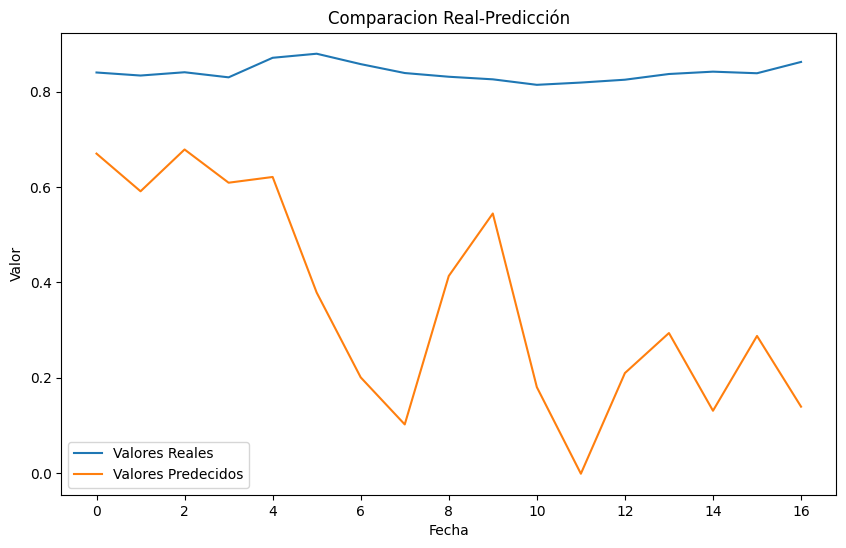

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Test_data_y,label='Valores Reales')
plt.plot(y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

###**3. Regresión Random Forest**

Mean Squared Error para Apple (AAPL) (Entrenamiento): 0.10692280689153788


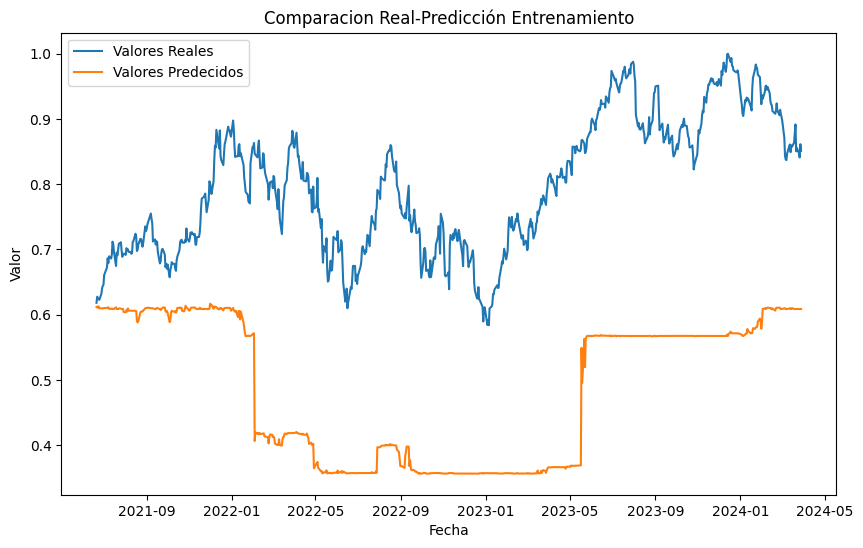

Mean Squared Error para Apple (AAPL) (Prueba): 0.00035542296438276813
Date
2024-04-01    0.842858
2024-04-02    0.836138
2024-04-03    0.840712
2024-04-04    0.836025
2024-04-05    0.840317
2024-04-08    0.833936
2024-04-09    0.840825
2024-04-10    0.830152
2024-04-11    0.871150
2024-04-12    0.879677
2024-04-15    0.857879
2024-04-16    0.839188
2024-04-17    0.831395
2024-04-18    0.825974
2024-04-19    0.814454
2024-04-22    0.819197
2024-04-23    0.825183
2024-04-24    0.837155
2024-04-25    0.842068
2024-04-26    0.838736
2024-04-29    0.862453
Name: AAPL, dtype: float64
[0.84564946 0.86013487 0.85217205 0.8489924  0.85407885 0.84648219
 0.84769462 0.84347404 0.84793688 0.84408052 0.84451028 0.84291781
 0.84242279 0.84529521 0.84903649 0.84568983 0.85026546 0.83715509
 0.85748972 0.85451462 0.84004639]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Perform Random Forest regression on the training data
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_reg.predict(X_test_scaled)
rf_reg.fit(X_test_scaled, y_test)
# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(y_test, y_pred)
print("Mean Squared Error para Apple (AAPL) (Entrenamiento):", mse_apple)

plt.figure(figsize=(10,6))
plt.plot(y_test.index,y_test,label='Valores Reales')
plt.plot(y_test.index,y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción Entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#---------------------------------------------------

# Make predictions on the testing data
y_pred = rf_reg.predict(Test_data_X_scaled)

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(Test_data_y, y_pred)
print("Mean Squared Error para Apple (AAPL) (Prueba):", mse_apple)
print(Test_data_y)
print(y_pred)

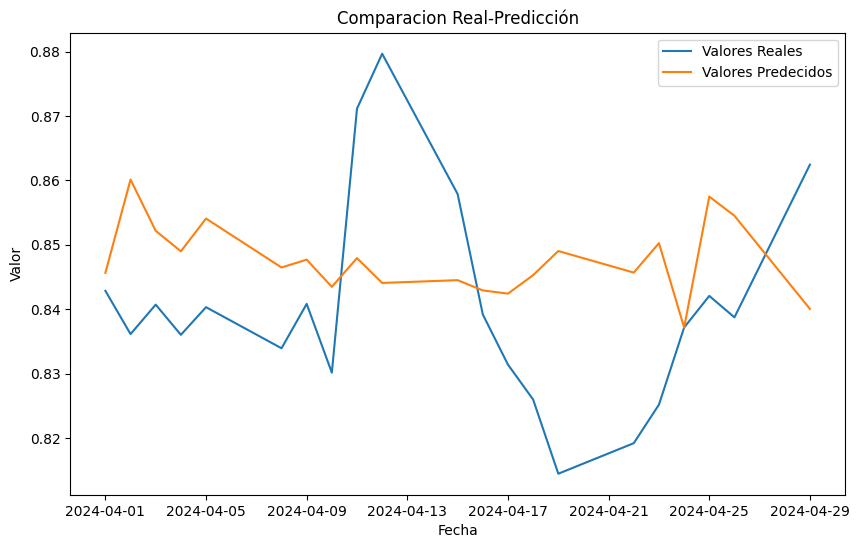

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Test_data_y.index,Test_data_y,label='Valores Reales')
plt.plot(Test_data_y.index,y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

###**4. Regresión Lineal SVR**

Mean Squared Error para Apple (AAPL) (Entrenamiento): 0.16834568270830166


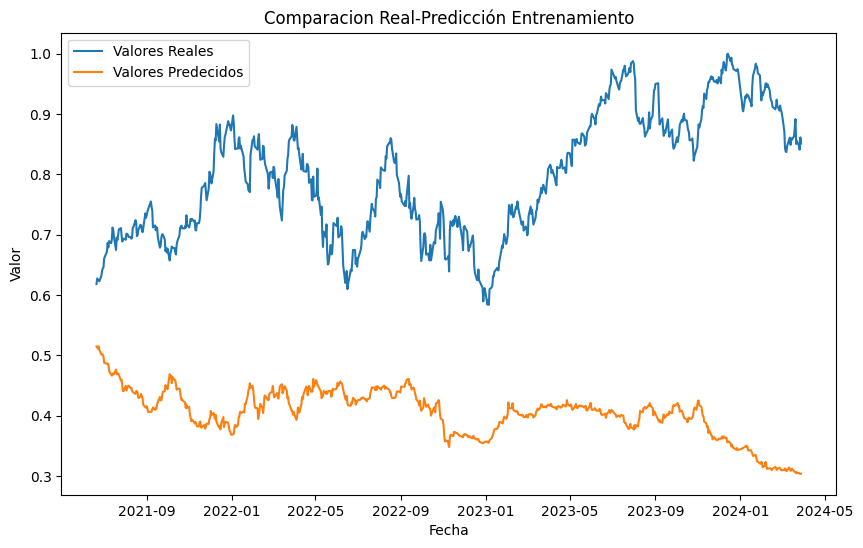

Mean Squared Error para Apple (AAPL) (Prueba): 0.0005841026850577796


In [ ]:
from sklearn.svm import SVR

# Perform Support Vector Regression on the training data
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = svr_reg.predict(X_test_scaled)

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(y_test, y_pred)
print("Mean Squared Error para Apple (AAPL) (Entrenamiento):", mse_apple)

plt.figure(figsize=(10,6))
plt.plot(y_test.index,y_test,label='Valores Reales')
plt.plot(y_test.index,y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción Entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#---------------------------------------------------
svr_reg.fit(X_test_scaled, y_test)

# Make predictions on the testing data
y_pred = svr_reg.predict(Test_data_X_scaled)

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(Test_data_y, y_pred)
print("Mean Squared Error para Apple (AAPL) (Prueba):", mse_apple)


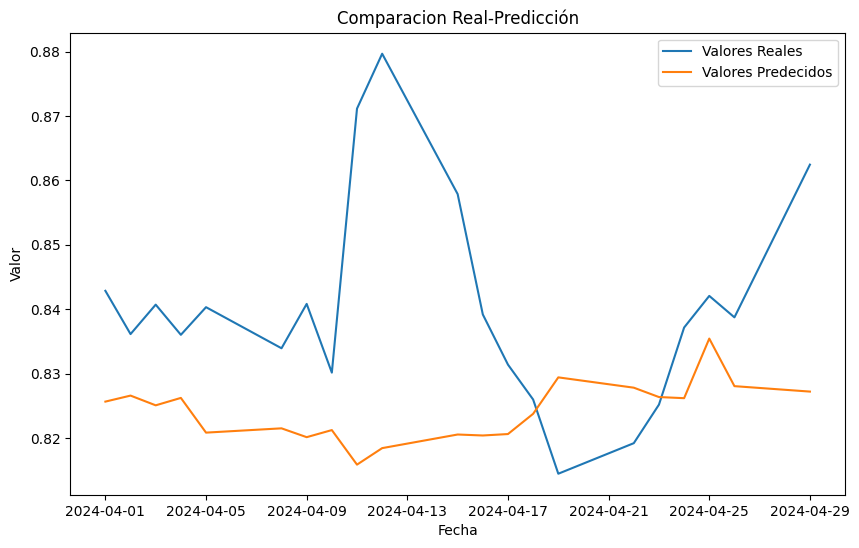

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Test_data_y.index,Test_data_y,label='Valores Reales')
plt.plot(Test_data_y.index,y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

###**5. Regresión Árbol de decisión**

Mean Squared Error para Apple (AAPL) (Entrenamiento): 0.10634614683689747


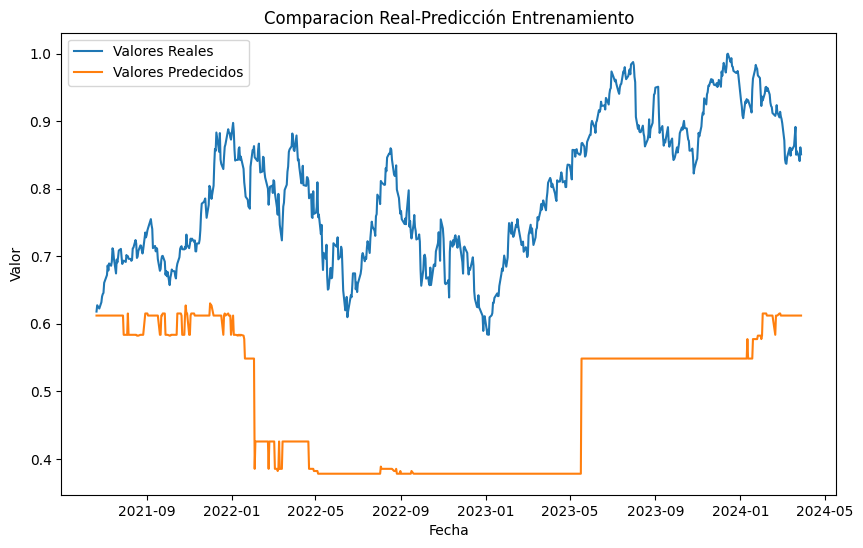

Mean Squared Error para Apple (AAPL) (Prueba): 0.000787250304073143
Date
2024-04-01    0.842858
2024-04-02    0.836138
2024-04-03    0.840712
2024-04-04    0.836025
2024-04-05    0.840317
2024-04-08    0.833936
2024-04-09    0.840825
2024-04-10    0.830152
2024-04-11    0.871150
2024-04-12    0.879677
2024-04-15    0.857879
2024-04-16    0.839188
2024-04-17    0.831395
2024-04-18    0.825974
2024-04-19    0.814454
2024-04-22    0.819197
2024-04-23    0.825183
2024-04-24    0.837155
2024-04-25    0.842068
2024-04-26    0.838736
2024-04-29    0.862453
Name: AAPL, dtype: float64
[0.85104624 0.87702245 0.87702245 0.87702245 0.87702245 0.87702245
 0.85104624 0.85556385 0.85104624 0.85104624 0.85104624 0.85556385
 0.84748869 0.84748869 0.85556385 0.85556385 0.85556385 0.86264121
 0.86264121 0.86264121 0.86264121]


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Perform Decision Tree regression on the training data
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = tree_reg.predict(X_test_scaled)

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(y_test, y_pred)
print("Mean Squared Error para Apple (AAPL) (Entrenamiento):", mse_apple)

plt.figure(figsize=(10,6))
plt.plot(y_test.index,y_test,label='Valores Reales')
plt.plot(y_test.index,y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción Entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#---------------------------------------------------

tree_reg.fit(X_test_scaled, y_test)

# Make predictions on the testing data
y_pred = tree_reg.predict(Test_data_X_scaled)

# Calculate the mean squared error for Apple
mse_apple = mean_squared_error(Test_data_y, y_pred)
print("Mean Squared Error para Apple (AAPL) (Prueba):", mse_apple)
print(Test_data_y)
print(y_pred)

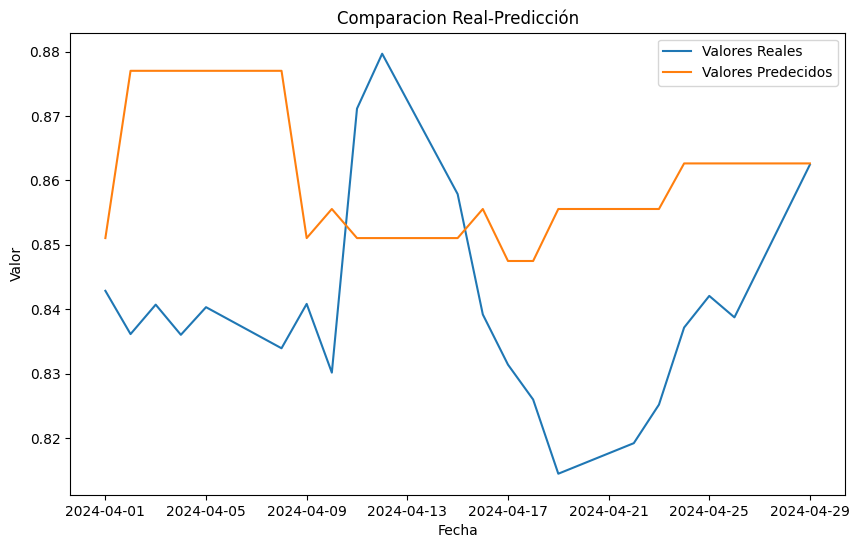

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Test_data_y.index,Test_data_y,label='Valores Reales')
plt.plot(Test_data_y.index,y_pred,label='Valores Predecidos')
plt.title('Comparacion Real-Predicción')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()